In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#df1= pd.read_csv('USState_Codes.csv')

In [3]:
df= pd.read_csv('AviationData.csv',encoding = "ISO-8859-1")
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
## Understanding the data

In [5]:
# there  are 88889 rows and 31 columns 
df.shape

(88889, 31)

In [6]:
# understanding the data
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [7]:
#getting the metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [8]:
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

###  Below columns contains floats(numbers with decimal points).
Total.Fatal.Injuries,
Total.Serious.Injuries,
Total.Minor.Injuries, 
Total.Uninjured,
Number.of.Engines , 
### All other columns has  str ( object)
### Some Columns eg latitude and longitude has a lot of missing data


In [9]:
# Basic desciption of the data.
df.describe

<bound method NDFrame.describe of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country Latitude Longitude Airport.Code  \
0      MOOSE CREEK, ID  Unit

In [10]:
#checking if there are rows with missing values
df.dropna(axis="index",how="all")

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
#checking if there are columns with missing values
df.dropna(axis="columns",how="all")

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [12]:
#checking if missing values are classified as missing values
df.isna()
df


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [14]:
#checking for duplicates .result , no duplicated rows
df.duplicated().value_counts()

False    88889
dtype: int64

## DATA CLEANNING 
### Picking relevants columns for analysis

In [15]:
relevant_columns=df[['Event.Id' ,'Investigation.Type','Location','Country', 'Latitude', 'Longitude','Make', 'Model','Aircraft.damage','Weather.Condition', 'Broad.phase.of.flight','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Event.Date']]
df1=relevant_columns
df1

,Event.Id,Investigation.Type,Location,Country,Latitude,Longitude,Make,Model,Aircraft.damage,Weather.Condition,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Date
0,20001218X45444,Accident,"MOOSE CREEK, ID",United States,NaN,NaN,Stinson,108-3,Destroyed,UNK,Cruise,2.0,0.0,0.0,0.0,1948-10-24
1,20001218X45447,Accident,"BRIDGEPORT, CA",United States,NaN,NaN,Piper,PA24-180,Destroyed,UNK,Unknown,4.0,0.0,0.0,0.0,1962-07-19
2,20061025X01555,Accident,"Saltville, VA",United States,36.9222,-81.8781,Cessna,172M,Destroyed,IMC,Cruise,3.0,NaN,NaN,NaN,1974-08-30
3,20001218X45448,Accident,"EUREKA, CA",United States,NaN,NaN,Rockwell,112,Destroyed,IMC,Cruise,2.0,0.0,0.0,0.0,1977-06-19
4,20041105X01764,Accident,"Canton, OH",United States,NaN,NaN,Cessna,501,Destroyed,VMC,Approach,1.0,2.0,NaN,0.0,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,"Annapolis, MD",United States,NaN,NaN,PIPER,PA-28-151,NaN,NaN,NaN,0.0,1.0,0.0,0.0,2022-12-26
88885,20221227106494,Accident,"Hampton, NH",United States,NaN,NaN,BELLANCA,7ECA,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2022-12-26
88886,20221227106497,Accident,"Payson, AZ",United States,341525N,1112021W,AMERICAN CHAMPION AIRCRAFT,8GCBC,Substantial,VMC,NaN,0.0,0.0,0.0,1.0,2022-12-26
88887,20221227106498,Accident,"Morgan, UT",United States,NaN,NaN,CESSNA,210N,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2022-12-26


In [16]:
#metadata for df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Latitude                34382 non-null  object 
 5   Longitude               34373 non-null  object 
 6   Make                    88826 non-null  object 
 7   Model                   88797 non-null  object 
 8   Aircraft.damage         85695 non-null  object 
 9   Weather.Condition       84397 non-null  object 
 10  Broad.phase.of.flight   61724 non-null  object 
 11  Total.Fatal.Injuries    77488 non-null  float64
 12  Total.Serious.Injuries  76379 non-null  float64
 13  Total.Minor.Injuries    76956 non-null  float64
 14  Total.Uninjured         82977 non-null

## Handling Missing Data

In [17]:
df1.dtypes


Event.Id                   object
Investigation.Type         object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Make                       object
Model                      object
Aircraft.damage            object
Weather.Condition          object
Broad.phase.of.flight      object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Event.Date                 object
dtype: object

In [18]:
df1['year'] = [int(i.split('-')[0]) for i in df1['Event.Date']]
df1['month'] = [int(i.split('-')[1]) for i in df1['Event.Date']]
df1['day'] = [int(i.split('-')[2]) for i in df1['Event.Date']]

In [19]:
#drop original columns"event.date" and latitude and longitudes because of high missing values 
df2=df1.drop(['Event.Date','Latitude','Longitude'],axis=1)
df2

,Event.Id,Investigation.Type,Location,Country,Make,Model,Aircraft.damage,Weather.Condition,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,month,day
0,20001218X45444,Accident,"MOOSE CREEK, ID",United States,Stinson,108-3,Destroyed,UNK,Cruise,2.0,0.0,0.0,0.0,1948,10,24
1,20001218X45447,Accident,"BRIDGEPORT, CA",United States,Piper,PA24-180,Destroyed,UNK,Unknown,4.0,0.0,0.0,0.0,1962,7,19
2,20061025X01555,Accident,"Saltville, VA",United States,Cessna,172M,Destroyed,IMC,Cruise,3.0,NaN,NaN,NaN,1974,8,30
3,20001218X45448,Accident,"EUREKA, CA",United States,Rockwell,112,Destroyed,IMC,Cruise,2.0,0.0,0.0,0.0,1977,6,19
4,20041105X01764,Accident,"Canton, OH",United States,Cessna,501,Destroyed,VMC,Approach,1.0,2.0,NaN,0.0,1979,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,"Annapolis, MD",United States,PIPER,PA-28-151,NaN,NaN,NaN,0.0,1.0,0.0,0.0,2022,12,26
88885,20221227106494,Accident,"Hampton, NH",United States,BELLANCA,7ECA,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2022,12,26
88886,20221227106497,Accident,"Payson, AZ",United States,AMERICAN CHAMPION AIRCRAFT,8GCBC,Substantial,VMC,NaN,0.0,0.0,0.0,1.0,2022,12,26
88887,20221227106498,Accident,"Morgan, UT",United States,CESSNA,210N,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2022,12,26


In [20]:
#calculating  the basic summary statistics for each column

df2.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,month,day
count,77488.000000,76379.000000,76956.000000,82977.000000,88889.000000,88889.000000,88889.000000
mean,0.647855,0.279881,0.357061,5.325440,1999.206662,6.591221,15.729089
std,5.485960,1.544084,2.235625,27.913634,11.888226,3.062868,8.837165
min,0.000000,0.000000,0.000000,0.000000,1948.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1989.000000,4.000000,8.000000
50%,0.000000,0.000000,0.000000,1.000000,1998.000000,7.000000,16.000000
75%,0.000000,0.000000,0.000000,2.000000,2009.000000,9.000000,23.000000
max,349.000000,161.000000,380.000000,699.000000,2022.000000,12.000000,31.000000


In [21]:
#for missing value in numerical categories , we replace with mean

df2["Total.Fatal.Injuries"].fillna(df2["Total.Fatal.Injuries"].mean(),inplace=True)
df2["Total.Serious.Injuries"].fillna(df2["Total.Serious.Injuries"].mean(),inplace=True)
df2["Total.Minor.Injuries"].fillna(df2["Total.Minor.Injuries"].mean(),inplace=True)
df2["Total.Uninjured"].fillna(df2["Total.Uninjured"].mean(),inplace=True)

df2

,Event.Id,Investigation.Type,Location,Country,Make,Model,Aircraft.damage,Weather.Condition,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,month,day
0,20001218X45444,Accident,"MOOSE CREEK, ID",United States,Stinson,108-3,Destroyed,UNK,Cruise,2.0,0.000000,0.000000,0.00000,1948,10,24
1,20001218X45447,Accident,"BRIDGEPORT, CA",United States,Piper,PA24-180,Destroyed,UNK,Unknown,4.0,0.000000,0.000000,0.00000,1962,7,19
2,20061025X01555,Accident,"Saltville, VA",United States,Cessna,172M,Destroyed,IMC,Cruise,3.0,0.279881,0.357061,5.32544,1974,8,30
3,20001218X45448,Accident,"EUREKA, CA",United States,Rockwell,112,Destroyed,IMC,Cruise,2.0,0.000000,0.000000,0.00000,1977,6,19
4,20041105X01764,Accident,"Canton, OH",United States,Cessna,501,Destroyed,VMC,Approach,1.0,2.000000,0.357061,0.00000,1979,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,"Annapolis, MD",United States,PIPER,PA-28-151,NaN,NaN,NaN,0.0,1.000000,0.000000,0.00000,2022,12,26
88885,20221227106494,Accident,"Hampton, NH",United States,BELLANCA,7ECA,NaN,NaN,NaN,0.0,0.000000,0.000000,0.00000,2022,12,26
88886,20221227106497,Accident,"Payson, AZ",United States,AMERICAN CHAMPION AIRCRAFT,8GCBC,Substantial,VMC,NaN,0.0,0.000000,0.000000,1.00000,2022,12,26
88887,20221227106498,Accident,"Morgan, UT",United States,CESSNA,210N,NaN,NaN,NaN,0.0,0.000000,0.000000,0.00000,2022,12,26


In [22]:
#sorting columns with missing data
missing_data=df2.isnull().sum()
missing_data.sort_values(ascending= False)


Broad.phase.of.flight     27165
Weather.Condition          4492
Aircraft.damage            3194
Country                     226
Model                        92
Make                         63
Location                     52
day                           0
month                         0
year                          0
Total.Uninjured               0
Total.Minor.Injuries          0
Total.Serious.Injuries        0
Total.Fatal.Injuries          0
Investigation.Type            0
Event.Id                      0
dtype: int64

####  Getting unique values and their distribution of values in the categorical columns.

In [23]:
df2['Broad.phase.of.flight'].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

In [24]:
df2['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [25]:
categories=['Weather.Condition',]
for c in categories:
    print(c , df2[c].unique())


Weather.Condition ['UNK' 'IMC' 'VMC' nan 'Unk']


In [26]:
df2['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

In [27]:
df2['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

In [28]:
df2['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

In [29]:
#Replacing missing values in categorical data

df2['Weather.Condition'].fillna('UNK', inplace=True)
df2['Broad.phase.of.flight'].fillna('Unknown', inplace=True)
df2['Aircraft.damage'].fillna('Unknown', inplace=True)
df2

,Event.Id,Investigation.Type,Location,Country,Make,Model,Aircraft.damage,Weather.Condition,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,month,day
0,20001218X45444,Accident,"MOOSE CREEK, ID",United States,Stinson,108-3,Destroyed,UNK,Cruise,2.0,0.000000,0.000000,0.00000,1948,10,24
1,20001218X45447,Accident,"BRIDGEPORT, CA",United States,Piper,PA24-180,Destroyed,UNK,Unknown,4.0,0.000000,0.000000,0.00000,1962,7,19
2,20061025X01555,Accident,"Saltville, VA",United States,Cessna,172M,Destroyed,IMC,Cruise,3.0,0.279881,0.357061,5.32544,1974,8,30
3,20001218X45448,Accident,"EUREKA, CA",United States,Rockwell,112,Destroyed,IMC,Cruise,2.0,0.000000,0.000000,0.00000,1977,6,19
4,20041105X01764,Accident,"Canton, OH",United States,Cessna,501,Destroyed,VMC,Approach,1.0,2.000000,0.357061,0.00000,1979,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,"Annapolis, MD",United States,PIPER,PA-28-151,Unknown,UNK,Unknown,0.0,1.000000,0.000000,0.00000,2022,12,26
88885,20221227106494,Accident,"Hampton, NH",United States,BELLANCA,7ECA,Unknown,UNK,Unknown,0.0,0.000000,0.000000,0.00000,2022,12,26
88886,20221227106497,Accident,"Payson, AZ",United States,AMERICAN CHAMPION AIRCRAFT,8GCBC,Substantial,VMC,Unknown,0.0,0.000000,0.000000,1.00000,2022,12,26
88887,20221227106498,Accident,"Morgan, UT",United States,CESSNA,210N,Unknown,UNK,Unknown,0.0,0.000000,0.000000,0.00000,2022,12,26


In [30]:
#safe df to excel for analysis using Tableau
df2.to_csv('AviationData1.csv',index= False)

## Data Analysis 

###  Using 5 W Analysis to understand the accidents data
Question to asnswer 
#### 5W 1H
##### what = Material ( What make  of airplanes reported most accidents)
##### why = why do accidents happen? root cause 
##### when = The time when accidents occurred
##### where = where did the accidents mostly occured ?location, country 
##### who = who was involved ,fatity levels
##### how = how does it happen?when do most accidents occur
 

In [31]:
#plane make that get damaged most = "What"
make_counts=df2['Make'].value_counts()
make_counts

Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
BOYD BRUCE             1
Casten                 1
SEACE DAVID A          1
POWERCHUTE             1
Gray Jim Robert        1
Name: Make, Length: 8237, dtype: int64

In [40]:
Model_values = df2['Model'].value_counts()

Model_values

152                2367
172                1756
172N               1164
PA-28-140           932
150                 829
                   ... 
DUNCAN/VARIEZE        1
B 206 SERIES 1        1
Airborne Edge-X       1
Renegade II           1
28                    1
Name: Model, Length: 12318, dtype: int64

In [32]:
# when do most accidents occur
whend= df2['Broad.phase.of.flight'].value_counts()
whend

Unknown        27713
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [33]:
#where did we get most accidents?...USA
top_10_countries = df1["Country"].value_counts()
top_10_countries

United States               82248
Brazil                        374
Canada                        359
Mexico                        358
United Kingdom                344
                            ...  
Turks and Caicos Islands        1
Bosnia And Herzegovina          1
Anguilla                        1
Scotland                        1
Corsica                         1
Name: Country, Length: 219, dtype: int64

In [34]:
#seasons with hightest accidents="when"
seasons=df2['Weather.Condition'].value_counts()
seasons

VMC    77303
IMC     5976
UNK     5348
Unk      262
Name: Weather.Condition, dtype: int64

In [35]:
#setting "year" column as our indec
df2 = df2.set_index('year')
df2

,Event.Id,Investigation.Type,Location,Country,Make,Model,Aircraft.damage,Weather.Condition,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,month,day
year,,,,,,,,,,,,,,,
1948,20001218X45444,Accident,"MOOSE CREEK, ID",United States,Stinson,108-3,Destroyed,UNK,Cruise,2.0,0.000000,0.000000,0.00000,10,24
1962,20001218X45447,Accident,"BRIDGEPORT, CA",United States,Piper,PA24-180,Destroyed,UNK,Unknown,4.0,0.000000,0.000000,0.00000,7,19
1974,20061025X01555,Accident,"Saltville, VA",United States,Cessna,172M,Destroyed,IMC,Cruise,3.0,0.279881,0.357061,5.32544,8,30
1977,20001218X45448,Accident,"EUREKA, CA",United States,Rockwell,112,Destroyed,IMC,Cruise,2.0,0.000000,0.000000,0.00000,6,19
1979,20041105X01764,Accident,"Canton, OH",United States,Cessna,501,Destroyed,VMC,Approach,1.0,2.000000,0.357061,0.00000,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,20221227106491,Accident,"Annapolis, MD",United States,PIPER,PA-28-151,Unknown,UNK,Unknown,0.0,1.000000,0.000000,0.00000,12,26
2022,20221227106494,Accident,"Hampton, NH",United States,BELLANCA,7ECA,Unknown,UNK,Unknown,0.0,0.000000,0.000000,0.00000,12,26
2022,20221227106497,Accident,"Payson, AZ",United States,AMERICAN CHAMPION AIRCRAFT,8GCBC,Substantial,VMC,Unknown,0.0,0.000000,0.000000,1.00000,12,26


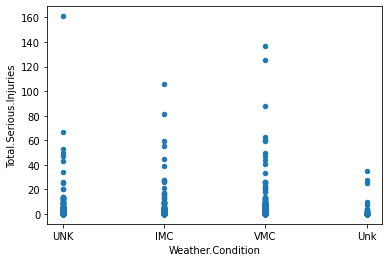

In [36]:
df2.plot('Weather.Condition', 'Total.Serious.Injuries', kind='scatter');


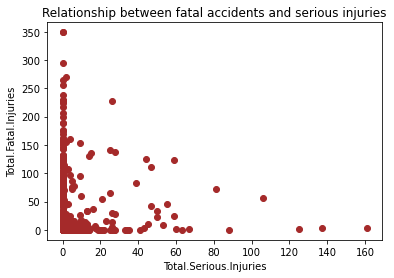

In [37]:
# Creating a scatter plot with specified marker size, color, and transparency
plt.scatter(df2['Total.Serious.Injuries'], df2['Total.Fatal.Injuries'],c='brown')

# Adding labels to the axes
plt.xlabel('Total.Serious.Injuries')
plt.ylabel('Total.Fatal.Injuries')

# Setting the title of the plot
plt.title('Relationship between fatal accidents and serious injuries')

# Displaying the plot
plt.show()
